In [1]:
#图像识别
    #文字识别,数字识别,物体识别
    #数据集DBRHD,MNIST
        #MNIST,28*28的图片,60000个手写体图片及对应标签,10000个手写体图片及对应标签
    #DBRHD,32*32的图片,7494个手写体图片与标签,3498个手写体图片与对应标签,文本矩阵
    
    #线性分类器,K近邻,非线性,svm,MLP多层感知器,卷积神经网络
    
#MLP ,32*32-->1024,多层感知机的输入为图片矩阵的展开的1024个神经元
#MLP输出:one-hot vectors,一个one-hot向量除了某一位的数字是1以外其余各维度数字都是0
#图片标签将表示成一个只有在第n个维度数字为1的10维向量,比如,标签0将表示成[1,0,0,0,0,0,0,0,0,0],即MLP的输出层具有10个神经元
    #本实例中,我们只设置一层隐藏层,在后续实验中比较该隐藏层神经元个数为50,100,200时的MLP效果
    
    

In [4]:
import numpy as np
from os import listdir#使用listdir模块,用于访问本地文件
from sklearn.neural_network import MLPClassifier#加载多层感知机

def img2vector(filename):
    retMat=np.zeros([1024],int)#定义返回矩阵,大小为1*1024
    fr=open(fileName)#打开文件
    lines=fr.readlines()#读取
    for i in range(32):#遍历文件所有行
        for j in range(32):#将01数字放在retMat中
            retMat[i*32+j]=lines[i][j]
    return retMat
def readDataSet(path):
    fileList=listdir(path)#获取文件夹下的所有文件
    numFiles=len(fileList)#统计需要读取的文件的数目
    dataSet=np.zeros([numFiles,1024],int)#用于存放所有的数字文件
    hwLabels=np.zeros([numFiles,10])#用于存放对应的标签one-hot
    for i in range(numFiles):#遍历所有的文件
        filePath=fileList[i]#获取文件名称/路径
        digit=int(filePath.split('_')[0])#通过文件名获取标签
        hwLabels[i][digit]=1.0#将对应的one-hot标签置1*****************
        dataSet[i]=img2vector(path+'/'+filePath)#读取文件内容
    return dataSet,hwLabels

train_dataSet,train_hwLabels=readDataSet('trainingDigits')

#构建神经网络:设置网络的隐藏层数,各隐藏层神经元个数,激活函数,学习率,优化方法,最大迭代次数
clf=MLPClassifier(hidden_layer_sizes=(100,),activation='logistic',solver='adam',learning_rate_init=0.0001,max_iter=2000)
#hidden_layer_sizes(num,layer),第i层隐藏层里神经元的个数
#使用adam优化方法

clf.fit(train_dataSet,train_hwLabels)
#fit函数能够根据训练集及对应标签集自动设置多层感知机的输入与输出层的神经元个数
#例:train_dataSet为n*1024的矩阵,train_hwLabels为n*10的矩阵,则fit函数将MLP的输入层神经元个数设为1024,输出层神经元个数为10

dataSet,hwLabels=readDataSet('testDigits')

result=clf.predict(dataSet)
error_num=0#统计预测错误的数目
num=len(dataSet)#测试集的数目
for i in range(num):#遍历预测结果
    #比较长度为10的数组,返回包含01的数组,0为不同,1为相同
    #若预测结果与真实结果相同,则10个数字全为1,否则不全为1
    if np.sum(result[i]==hwLabels[i])<10:
        error_num+=1
print('Total num:',num,'Wrong num:',error_num,'Wrong Rate:',error_num/float(num))

    




In [5]:
import numpy as np
from os import listdir#使用listdir模块,用于访问本地文件
from sklearn.neural_network import MLPClassifier#加载多层感知机
MLPClassifier?

In [ ]:
import numpy as np
from os import listdir
from sklearn.neighbors import KNeighborsClassifier as KNN

def img2vector(filename):
    retMat=np.zeros([1024],int)#定义返回矩阵,大小为1*1024
    fr=open(fileName)#打开文件
    lines=fr.readlines()#读取
    for i in range(32):#遍历文件所有行
        for j in range(32):#将01数字放在retMat中
            retMat[i*32+j]=lines[i][j]
    return retMat

def readDataSet(path):
    fileList=listdir(path)#获取文件夹下的所有文件
    numFiles=len(fileList)#统计需要读取的文件的数目
    dataSet=np.zeros([numFiles,1024],int)#用于存放所有的数字文件
    hwLabels=np.zeros([numFiles,10])#用于存放对应的标签one-hot
    for i in range(numFiles):#遍历所有的文件
        filePath=fileList[i]#获取文件名称/路径
        digit=int(filePath.split('_')[0])#通过文件名获取标签
        hwLabels[i][digit]=1.0#将对应的one-hot标签置1*****************
        dataSet[i]=img2vector(path+'/'+filePath)#读取文件内容
    return dataSet,hwLabels

train_dataSet,train_hwLabels=readDataSet('trainingDigits')
dataSet,hwLabels=readDataSet('testDigits')

#KNN是一种懒惰学习算法,没有学习过程只在预测时去查找最近邻的点,数据集的输入就是构建KNN的分类器的过程
knn=KNN(algorithm='kd_tree',n_nieghbors=3)
knn.fit(train_dataSet,train_hwLabels)

result=knn.predict(dataSet)
error_num=np.sum(result!=hwLabels)
num=len(dataSet)
print("Total num:",num,"Wrong num:",error_num,'Wrong rate:',error_num/float(num))

#当样本为稀疏数据集时,其第k个邻居点可能与测试点距离较远,因此投出 错误的一票而影响了最终的预测结果


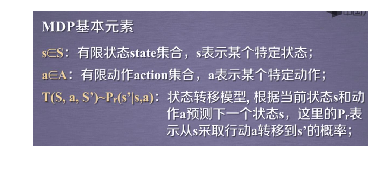

None


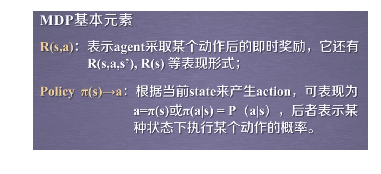

In [1]:
#强化学习,就是程序通过与环境不断地进行交互学习一个从环境到动作的映射,学习的目标就是使累积回报最大化.
#强化学习是一种试错学习,因其在各种状态下需要尽量尝试所有可以选择的动作,通过环境给出的反馈来判断动作的优劣,最终获得环境和最优动作的反馈
#

#MDP(Markov Decision Precess):智能体agent根据当前对环境的观察和采取动作获得环境的反馈,并使环境发生改变的循环.
    #有限状态state的集合
    #有限动作action的集合
    #状态转移模型,根据当前状态s和动作a预测下一个状态s,其中概率表示从s采取行动a转移到s'的概率
    #agent采取某个行动后的即时奖励
    #根据当前state来产生的action.
    
    #状态值函数表示执行策略能得到的累积折扣奖励
    #状态动作值函数表示在状态s下执行动作a能够得到的累积折扣奖励
    
    #最优值函数即在最优策略下得到的值函数
    
    #最优控制:在得到最优值函数之后,可以通过值函数的值得到状态s下应该采取的动作a
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib
%matplotlib inline
mdp=img.imread('C:\\Users\\hzg0601\\Pictures\\mdp.jpg')
mdp2=img.imread('C:\\Users\\hzg0601\\Pictures\\mdp2.jpg')


plt.imshow(mdp)
plt.axis('off')

print(plt.show())
plt.imshow(mdp2)
plt.axis('off')
plt.show()

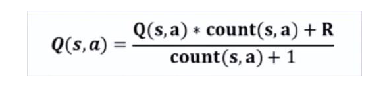

In [16]:
#蒙特卡罗强化学习
    #在现实的强化学习任务中,环境的转移概率\奖励倍数往往很难获知,甚至很难得到环境中有多少状态,若学习算法不再依赖于环境建模,则称免模型学习,
    #蒙特卡罗强化学习就是一种免模型学习
    #蒙特卡罗强化学习使用多次采样,然后求平均累积奖赏作为期望累积奖赏的近似
    #直接对状态动作值函数Q(s,a)进行估计,每采样一条轨迹,就根据轨迹中所有'状态-动作'利用下面的公式对来对值函数进行更新
mtkr=img.imread('C:\\Users\\hzg0601\\Pictures\\mtkr.jpg')
plt.imshow(mtkr)
plt.axis('off')
plt.show()    

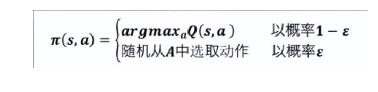

In [17]:
    #每次采样更新完所有的'状态-动作'对所对应的Q(s,a),就需要更新采样策略pi,但由于策略可能是确定性的,即一个状态对应一个动作,
    #多次采样可能获得相同采样轨迹,因此需要借助epsilon贪心算法
epsilon=img.imread('C:\\Users\\hzg0601\\Pictures\\epsilon.jpg')
plt.imshow(epsilon)
plt.axis('off')
plt.show()    

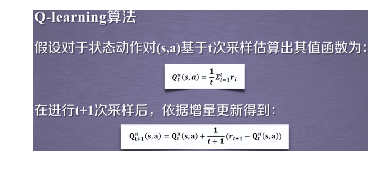

None


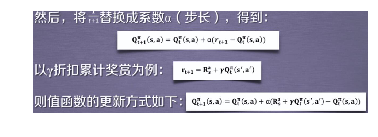

In [19]:
#Q-learning算法
    #蒙特卡罗强化学习算法需要采样一个完整的轨迹来更新值函数,效率较低,此外该算法没有充分利用强化学习任务的序贯决策结构.
    #Q-learing算法结合了动态规划与蒙特卡罗方法的思想,使得学习更加高效
Q1=img.imread('C:\\Users\\hzg0601\\Pictures\\Q_learning.jpg')
plt.imshow(Q1)
plt.axis('off')
print(plt.show())    
Q2=img.imread('C:\\Users\\hzg0601\\Pictures\\Q2.jpg')
plt.imshow(Q2)
plt.axis('off')
plt.show()

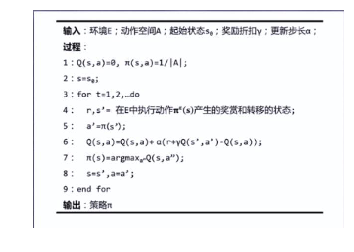

In [21]:
Qaa=img.imread('C:\\Users\\hzg0601\\Pictures\\Qaa.jpg')
plt.imshow(Qaa)
plt.axis('off')
plt.show()

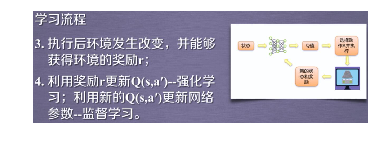

In [22]:
#深度强化学习
    #传统强化学习:真实环境中的状态数目过多,求解困难
    #深度强化学习:将深度学习和强化学习结合在一起,通过深度神经网络直接学习环境(或观察)与状态动作值函数Q(s,a)之间的映射关系,简化问题的求解
    #DQN(Deep Q Network):是将神经网络(neural network)和Q-learning结合,利用神经网络近似模拟函数Q(s,a)输入是问题的状态(图形),输出是每个动作a
    #对应的Q值,然后依据Q值大小选择对应状态执行的动作,以完成控制.2013年NIPS,playing atari with deep reinforcement learning
    #神经网络的参数:应用监督学习的方法完成
dqn=img.imread('C:\\Users\\hzg0601\\Pictures\\dqn.jpg')
plt.imshow(dqn)
plt.axis('off')
plt.show()    

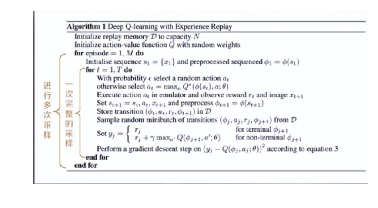

In [23]:
dqna=img.imread('C:\\Users\\hzg0601\\Pictures\\dqna.jpg')
plt.imshow(dqna)
plt.axis('off')
plt.show()

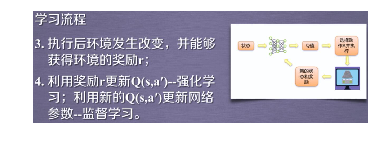

None


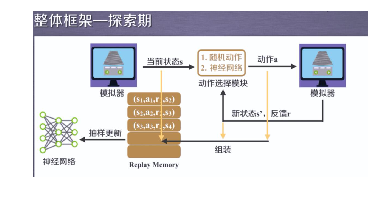

None


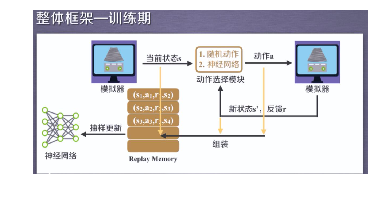

None


In [2]:
#flaping bird    https://github.com/sourabhv/FlapPyBird
#程序与模拟器交互
    #训练过程也就是神经网络(agent)不断与游戏模拟器(environment)进行交互,
    #通过模拟器获得状态,给出动作,改变模拟器中的状态,获得反馈,依据反馈更新策略的过程
 #训练过程
    #观察期(observe):程序与模拟器进行交互,随机给出动作,获取模拟器中的状态,将状态转移过程放在D(Replay Memory)中;
    #探索期(explore):程序与模拟器交互的过程中,依据repaly memory中存储的历史信息更新网络参数,并随训练过程降低随机探索率epsilon
    #训练期(train):epsilon,已经很小,不再发生改变,网络参数,随着训练过程不断趋于稳定.
dqn1=img.imread('C:\\Users\\hzg0601\\Pictures\\dqn.jpg')
plt.imshow(dqn1)
plt.axis('off')
print(plt.show())
dqn2=img.imread('C:\\Users\\hzg0601\\Pictures\\dqn2.jpg')
plt.imshow(dqn2)
plt.axis('off')
print(plt.show())
dqn3=img.imread('C:\\Users\\hzg0601\\Pictures\\dqn3.jpg')
plt.imshow(dqn3)
plt.axis('off')
print(plt.show())

In [3]:
#游戏模拟器:使用Pygame模块完成的FlappyBird游戏程序,为了配合训练过程,在原有的游戏程序基础上进行了修改.
#通过模拟器获取游戏的画面
#使用连续4帧图像作为一个状态s,用于神经网络的输入
#动作选择模块:为epsilon贪心策略的简单应用,以概率epsilon随机从动作空间A中选择动作,以epsilon概率依靠神经网络的输出选择动作

#DQN,用卷积神经网络对游戏画面进行特征提取,这个步骤可以理解为对状态的提取.

#卷积神经网络
#使用卷积核与数据进行对应位置的乘积并加和,不断移动卷积核生成卷积后的特征.
#池化操作,对卷积的结果进行操作,最常用的是最大池化操作,即从卷积结果中挑出最大值
#即把Image矩阵中的每个元素当作一个神经元,那么卷积核就相当于输入神经元,那么卷积核就相当于输入神经元和输出之间的链接权重,由此构建而成的网络即CNN

#深度神经网络结构就是多个卷积操作和池化操作的累加

#在tensorflow中需要用四维向量作为卷积核

#通过获得输入s,神经网络就能够:
    #输出Q(s,a1)和Q(s,a2)比较两个值的大小,就能够评判采用动作a1和a2的优劣,从而选择要采取的动作;
    #在选择并执行完采用的动作后,模拟器会更新状态并返回回报值,然后将这个状态转移过程存储进D,进行采样更新网络参数
dqn5=img.imread('C:\\Users\\hzg0601\\Pictures\\dqn5.jpg')
plt.imshow(dqn5)
plt.axis('off')
print(plt.show())

In [4]:
#tensorflow
    #使用图graph来表示计算任务
    #在被称之为会话(session)的上下文(context)中执行图
    #使用张量(tensor)来表示数据
    #通过变量(variable)维护状态
    #使用feed和fetch可以为任意的操作(arbitrary operation)赋值或者从其中获取数据
    
    #Tensorflow是一个编程系统,使用图来表示计算任务.图中的节点被称作op(operation),op可以获得0个或多个tensor,产生0个或多个tensor.每个tensor
    #是一个类型化的多维数组.例如:可以将一组图像表示成一个四维的浮点数组,四个维度分别为[batch,height,weight,channels]
    
    #图描述了计算的过程.为了进行计算,图必须在会话中启动,会话负责将图中的op分发到CPU或GPU上进行计算,然后将产生的tensor返回.在python中,tensor
    #就是numpy.ndarray对象.
    
    
    #tensorflow程序通常被组织成两个阶段:构建阶段和执行阶段
        #构建阶段:op的执行顺序被描述成一个图;
        #执行阶段:使用会话执行图中的op.
    
    #交互式会话(InteractiveSession):
    #为了方便使用Ipython之类的Python交互环境,可以使用交互式会话(InteractiveSession)来代替Session,使用Tensor.run()和Operation.eval()来代替
    #Session.run(),避免使用一个变量来持有会话.
    
    #feed操作:
    #在session和交互式会话中,数据均以变量或常量的形式进行存储.tensorflow还提供了feed机制,该机制可以临时替代图中任意操作符的tensor,最常见的是
    #使用tf.placeholder()创建占位符,相当于是作为图中的输入,然后使用feed机制向图中占位符提供数据进行计算.

In [2]:
#session
import tensorflow as tf#导入tensorflow
mat1=tf.constant([[3.,3.]])#创建一个1*2的矩阵
mat2=tf.constant([[2.],[2.]])#创建一个2*1的矩阵
product=tf.matmul(mat1,mat2)#创建op执行两个矩阵的乘法
sess=tf.Session()#启动默认图
res=sess.run(product)
print(res)


[[12.]]


In [2]:
#interactiveSession
import tensorflow as tf#导入tensorflow
sess=tf.InteractiveSession()#创建交互式会话
a=tf.Variable([1.0,2.0])#创建变量数组
b=tf.constant([3.0,4.0])#创建常量数组
sess.run(tf.global_variables_initializer())#变量初始化
res=tf.add(a,b)#创建加法操作
print(res.eval())#使用eval执行操作,输出结果


[4. 6.]


In [6]:
#feed
import tensorflow as tf
sess=tf.InteractiveSession()
input1=tf.placeholder(tf.float32)#创建占位符
input2=tf.placeholder(tf.float32)
res=tf.multiply(input1,input2)#创建乘法操作
res.eval(feed_dict={input1:[7.],input2:[2.]})#利用字典进行赋值,调用eval求值



array([14.], dtype=float32)

In [7]:
import cv2#opencv库
import tensorflow as tf#tensorflow
import sys
sys.path.append('game/')#添加game目录到系统环境变量
import wrapped_flappy_bird as game#加载游戏
import random
import numpy as np
from collections import deque#导入双端队列

#设置超参数
GAME='bird'#设置游戏名称
ACTIONS=2 #设置游戏动作数目(点击不点击屏幕)
GAMMA=0.99#设置增强学习更新公式中的累积折扣因子
OBSERVE=10000#观察期 1万次迭代(随机指定动作获得D）
EXPLORE=2000000#探索期
FINAL_EPSILON=0.0001#设置ε贪婪策略的最终值
INITIAL_EPSILON=0.1#设置ε贪婪策略的初始值
REPLAY_MEMORY=50000#设置replay memory的容量
BATCH=32#设置每次网络参数更新时用的样本数目
FRAME_PER_ACTION=1#设置几帧图像进行一次动作

#创建深度神经网络
def weight_variable(shape):
    initial=tf.truncated_normal(shape,stddev=0.01)
    return tf.Variable(initial)
#首先定义一个函数,该函数用于生成形状为shape的张量
#张量中的初始化数值分布服从正态分布,且方差为0.01
def bias_variable(shape):
    initial=tf.constant(0.01,shape=shape)
    return tf.Variable(initial)
#定义另外一个函数,用于生成偏置项,初始值为0.01

def conv2d(x,W,stride):
    return tf.nn.conv2d(x,W,strides=[1,stride,stride,1],padding='SAME')
#定义卷积操作,实现卷积核W在数据x上的卷积操作
#stride为卷积核的移动步长,padding为卷积的一种模式,参数为same表示滑动范围超过边界时,...
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
#定义池化函数,此程序中通过调用max_pool执行最大池化操作,大小为2*2,stride步长为2

def creatNetwork():
    #定义深度神经网络的参数和偏置
    W_conv1=weight_variable([8,8,4,32])#第一个卷积层
    b_conv1=bias_variable([32])
    
    W_conv2=weight_variable([4,4,32,64])#第二个卷积层
    b_conv2=bias_variable([64])
    
    W_conv3=weight_variable([3,3,64,64])#第三个卷积层
    b_conv3=bias_variable([64])
    
    W_fc1=weight_variable([1600,512])#第一个全连接层
    b_fc1=bias_variable([512])
    
    W_fc2=weight_variable([512,ACTIONS])#第二个全连接层
    b_fc2=bias_variable([ACTIONS])
    
    #输入层
    s=tf.placeholder('float',[None,80,80,4])#输入层,placeholder用于占位,可用于网络的输入

    #隐藏层
    h_conv1=tf.nn.relu(conv2d(s,W_conv1,4)+b_conv1)
    h_pool1=max_pool_2x2(h_conv1)

    h_conv2=tf.nn.relu(conv2d(h_pool1,W_conv2,2)+b_conv2)


    h_conv3=tf.nn.relu(conv2d(h_conv2,W_conv3,1)+b_conv3)

    h_conv3_flat=tf.reshape(h_conv3,[-1,1600])
    h_fc1=tf.nn.relu(tf.matmul(h_conv3_flat,W_fc1)+b_fc1)

    #输入层
    readout=tf.matmul(h_fc1,W_fc2)+b_fc2
    return s,readout,h_fc1


#神经网络训练函数,定义损失函数
def trainNetwork(s,readout,h_fc1,sess):
    #定义损失函数
    a=tf.placeholder('float',[None,ACTIONS])
    y=tf.placeholder('float',[None])
    readout_action=tf.reduce_sum(tf.multiply(readout,a),reduction_indices=1)
    cost=tf.reduce_mean(tf.square(y-readout_action))
    train_step=tf.train.AdamOptimizer(1e-6).minimize(cost)
    #开启游戏模拟器,打开一个模拟器窗口,实时显示游戏的信息
    game_state=game.GameState()
    #创建双端队列用于存放replay memory
    D=deque()
    
    #获取游戏的初始状态,设置动作为不执行跳跃,并将初始状态修改为80*80*4大小
    
    do_nothing=np.zeros(ACTIONS)
    do_nothing[0]=1#不执行跳跃
    x_t,r_0,terminal=game_state.frame_step(do_nothing)#获得游戏的首帧图像
    x_t=cv2.cvtColor(cv2.resize(x_t,(80,80)),cv2.COLOR_BGR2GRAY)#将图像处理成80*80大小
    ret,x_t=cv2.threshold(x_t,1,255,cv2.THRESH_BINARY)#将像素值大于等于1的像素点处理成255,也就是黑白二值图
    s_t=np.stack((x_t,x_t,x_t,x_t),axis=2)#构造四帧的原始输入
    
    #用于加载或保存网络参数
    saver=tf.train.Saver()
    sess.run(tf.initialize_all_variables())
    checkpoint=tf.train.get_checkpoint_state('saved_networks')
    if checkpoint and checkpoint.model_checkpoint_path:
        saver.restore(sess,checkpoint.model_checkpoint_path)
        print('Successfully loaded:',checkpoint.model_checkpoint_path)
    else:
        print('Could not find old network weights')
    #开始训练
    epsilon=INITIAL_EPSILON
    t=0
    while 'flappy bird'!='angry bird':
        #使用epsilon贪心策略选择一个动作
        readout_t=readout.eval(feed_dict={s:[s_t]})[0]
        a_t=no.zeros([ACTIONS])
        action_index=0
        if t%FRAME_PER_ACTION==0:
            #执行一个随机动作
            if random.random()<=epsilon:
                print('-----Random Action------')
                action_index=random.randrange(ACTIONS)
                a_t[random.randrange(ACTIONS)]=1
            #由神经网络计算的Q(s,a)值选择对应的动作
            else:
                action_index=np.argmax(readout_t)
                a_t[action_index]=1
        else:
            a_t[0]=1#不执行跳跃动作
        #随游戏的进行,不断降低epsilon,减少随机动作
        if epsilon>FINAL_EPSILON and t>OBSERVE:
            epsilon-=(INITIAL_EPSILON-FINAL_EPSILON)/EXPLORE
        #执行选择的动作,并获得下一个状态及回报
        x_t1_colored,r_t,terminal=game_state.frame_step(a_t)
        x_t1=cv2.cvtColor(cv2.resize(x_t1_colored,(80,80)),cv2.COLOR_BGR2GRAY)
        ret,x_t1=cv2.threshold(x_t1,1,255,cv2.THRESH_BINARY)
        x_t1=np.reshape(x_t1,(80,80,1))
        s_t1=np.append(x_t1,s_t[:,:,:3],axis=2)
        #将状态转移过程存储到D中,用于更新参数时采样
        D.append((s_t,a_t,r_t,s_t1,terminal))
        if len(D)>REPLAY_MEMORY:
            D.popleft()
    

In [ ]:
#参数训练完成之后,修改程序中的超参数,INITILAL_EPSILON=0,即不使用随机动作,直接由神经网络输出动作
#在saved_networks文件夹下,保存了最近几次检查点保留的网络参数,只需使用tf.train.Saver()加载参数就可以使用了(无需修改)
#训练参数加载:修改checkpoint配置文件,加载保存的网络参数,默认加载最后一次保存的参数..

model_checkpoint_path:'bird-dqn-2570000'
all model checkpoint paths:'bird-dqn-2570000'
